# Computing the inverse of SynFracInt using Chebyshev polynomials

In [4]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

### Attempting to duplicate the Geant4 implementation

From H. Burkhardt, "MONTE CARLO GENERATION OF THE ENERGY SPECTRUM OF SYNCHROTRON RADIATION", CLIC-Note-709 (2007).

A table of expressions are outlined for directly computing the $InvSynFracInt(y)$ function:

- $y < 0.7$ : $y^3 P_{ch,1}(y)$
- $0.7 \leq y \leq 0.91322603$ : $P_{ch,2}(y)$
- $y > 0.91322603$ : $-\log(1-y)P_{ch,3}(-\log(1-y))$


According to the paper, a large number of coefficients are used for each of the $P_{Ch,n}$ computations. The `G4SynchronotronRadiation.cc` file contains a list of coefficients. Following the code presented there, we use those coefficients to compute a value ofr the Chebyshev polynomial 

In [6]:
c1vals = [1.22371665676046468821,0.108956475422163837267,0.0383328524358594396134,0.00759138369340257753721,
          0.00205712048644963340914,0.000497810783280019308661,0.000130743691810302187818,0.0000338168760220395409734,
          8.97049680900520817728e-6,2.38685472794452241466e-6,6.41923109149104165049e-7,1.73549898982749277843e-7,
          4.72145949240790029153e-8,1.29039866111999149636e-8,3.5422080787089834182e-9,9.7594757336403784905e-10,
          2.6979510184976065731e-10,7.480422622550977077e-11,2.079598176402699913e-11,5.79533622220841193e-12,
          1.61856011449276096e-12,4.529450993473807e-13,1.2698603951096606e-13,3.566117394511206e-14,1.00301587494091e-14,
          2.82515346447219e-15,7.9680747949792e-16]
c2vals = [1.1139496701107756,0.3523967429328067,0.0713849171926623,0.01475818043595387,0.003381255637322462,
          0.0008228057599452224,0.00020785506681254216,0.00005390169253706556,0.000014250571923902464,3.823880733161044e-6,
          1.0381966089136036e-6,2.8457557457837253e-7,7.86223332179956e-8,2.1866609342508474e-8,6.116186259857143e-9,
          1.7191233618437565e-9,4.852755117740807e-10,1.3749966961763457e-10,3.908961987062447e-11,1.1146253766895824e-11,
          3.1868887323415814e-12,9.134319791300977e-13,2.6211077371181566e-13,7.588643377757906e-14,2.1528376972619e-14,
          6.030906040404772e-15,1.9549163926819867e-15]
c3vals = [1.2292683840435586977,0.160353449247864455879,-0.0353559911947559448721,0.00776901561223573936985,
          -0.00165886451971685133259,0.000335719118906954279467,-0.0000617184951079161143187,9.23534039743246708256e-6,
          -6.06747198795168022842e-7,-3.07934045961999778094e-7,1.98818772614682367781e-7,-8.13909971567720135413e-8,
          2.84298174969641838618e-8,-9.12829766621316063548e-9,2.77713868004820551077e-9,-8.13032767247834023165e-10,
          2.31128525568385247392e-10,-6.41796873254200220876e-11,1.74815310473323361543e-11,-4.68653536933392363045e-12,
          1.24016595805520752748e-12,-3.24839432979935522159e-13,8.44601465226513952994e-14,-2.18647276044246803998e-14,
          5.65407548745690689978e-15,-1.46553625917463067508e-15,3.82059606377570462276e-16,-1.00457896653436912508e-16]
c4vals = [1.69342658227676741765,0.0742766400841232319225,-0.019337880608635717358,0.00516065527473364110491,
          -0.00139342012990307729473,0.000378549864052022522193,-0.000103167085583785340215,0.0000281543441271412178337,
          -7.68409742018258198651e-6,2.09543221890204537392e-6,-5.70493140367526282946e-7,1.54961164548564906446e-7,
          -4.19665599629607704794e-8,1.13239680054166507038e-8,-3.04223563379021441863e-9,8.13073745977562957997e-10,
          -2.15969415476814981374e-10,5.69472105972525594811e-11,-1.48844799572430829499e-11,3.84901514438304484973e-12,
          -9.82222575944247161834e-13,2.46468329208292208183e-13,-6.04953826265982691612e-14,1.44055805710671611984e-14,
          -3.28200813577388740722e-15,6.96566359173765367675e-16,-1.294122794852896275e-16]

In [7]:
def myChebyshev(a,b,c,x):
    '''Python version of the Chebyshev function used in Geant4. See G4SynchrotronRadiation.hh'''
    
    y2 = 2.*(2.*x - a - b)/(b-a)
    y = y2/2.
    #print "value of 2y is {}".format(y2)
    
    d = 0 #nth index (n)
    dd = 0 #next decrement (n-1)
    
    nvals = len(c) #number of coefficients
    
    for index in range(1,nvals):
        j = nvals-index
        #print "Value of j is {}".format(j)
        temp_n = d
        d = y2*d - dd + c[j]
        #print "d is {}".format(d)
        dd = temp_n
        
    return y*d - dd + 0.5*c[0] #add last coefficient

In [13]:
nps = 1000
x = np.linspace(0.01,0.99999,nps)
y = -1.*np.log(1.-x)
x1 = np.linspace(0.01,0.7,nps)
x2 = np.linspace(0.7,0.91322603,nps)
x3 = np.linspace(0.91322603,0.9999158637,nps)
x4 = np.linspace(0.9999158637,0.9999999999,nps)

#boundary coefficients for computing values
a2=0.7
a3=0.91322603
a4=2.4444485538746025480
a5=9.3830728608909477079
a6=33.122936966163038145

y1 = myChebyshev(0.01,0.7,c1vals,x1)*(x1**3)
y2 = myChebyshev(0.7,0.91322603,c2vals,x2)
y3 = -1.*np.log(1-x3)*myChebyshev(a4,a5,c3vals,-1.*np.log(1-x3))
y4 = -1.*np.log(1-x4)*myChebyshev(a5,a6,c4vals,-1.*np.log(1-x4))

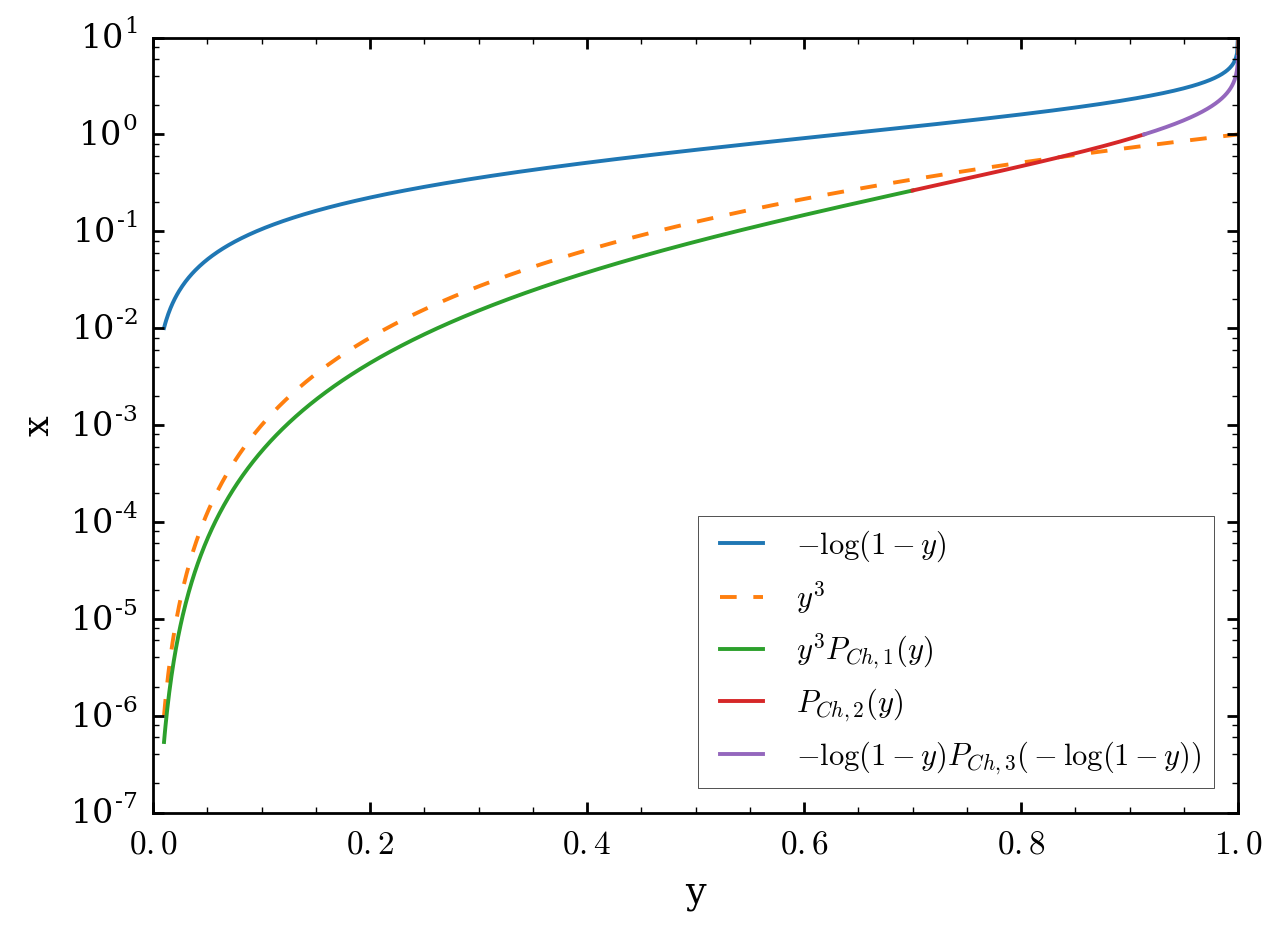

In [9]:
with mpl.style.context('rs_paper'):

    fig = plt.figure()
    ax = fig.gca()
    ax.semilogy(x,y, label=r'$-\log(1-y)$')
    ax.semilogy(x,x**3, '--', label=r'$y^3$')
    
    ax.semilogy(x1,y1, label=r'$y^3 P_{Ch,1}(y)$')
    ax.semilogy(x2,y2, label=r'$P_{Ch,2}(y)$')
    ax.semilogy(x3,y3, label=r'$-\log(1-y)P_{Ch,3}(-\log(1-y))$')
    ax.semilogy(x4,y4)
    
    ax.set_ylabel('x')
    ax.set_xlabel('y')
    
    ax.legend(loc='lower right',prop={'size': 11})
    
    ax.set_ylim(1e-7,1e1)
    
    fig.savefig('InvSynFracInt_G4.png', bbox_inches='tight')

### Now to wrap the code in a single function

In [37]:
def compute_InvSynFracInt(x):
    '''
    Directly computes InvSynFracInt following the Geant4 implementation documented by Burkhardt.
    
    Not currently vectorized. Should use np.where() for simple evaluation of large arrays.
    
    '''
    
    #boundary coefficients for computing values near y=1
    a1=0
    a2=0.7
    a3=0.91322603
    a4=2.4444485538746025480
    a5=9.3830728608909477079
    a6=33.122936966163038145
    
    bound = 0.9999158637
    
    if x < a2:
        return myChebyshev(0,a2,c1vals,x)*(x**3)
    elif x < a3:
        return myChebyshev(a2,a3,c2vals,x)
    elif x < bound:
        return -1.*np.log(1-x)*myChebyshev(a4,a5,c3vals,-1.*np.log(1-x))
    else:
        return -1.*np.log(1-x)*myChebyshev(a5,a6,c4vals,-1.*np.log(1-x))

In [38]:
y1 = myChebyshev(0.01,0.7,c1vals,x1)*(x1**3)
y2 = myChebyshev(0.7,0.91322603,c2vals,x2)
y3 = -1.*np.log(1-x3)*myChebyshev(a4,a5,c3vals,-1.*np.log(1-x3))
y4 = -1.*np.log(1-x4)*myChebyshev(a5,a6,c4vals,-1.*np.log(1-x4))

In [39]:
yt = []
for val in x:
    yt.append(compute_InvSynFracInt(val))

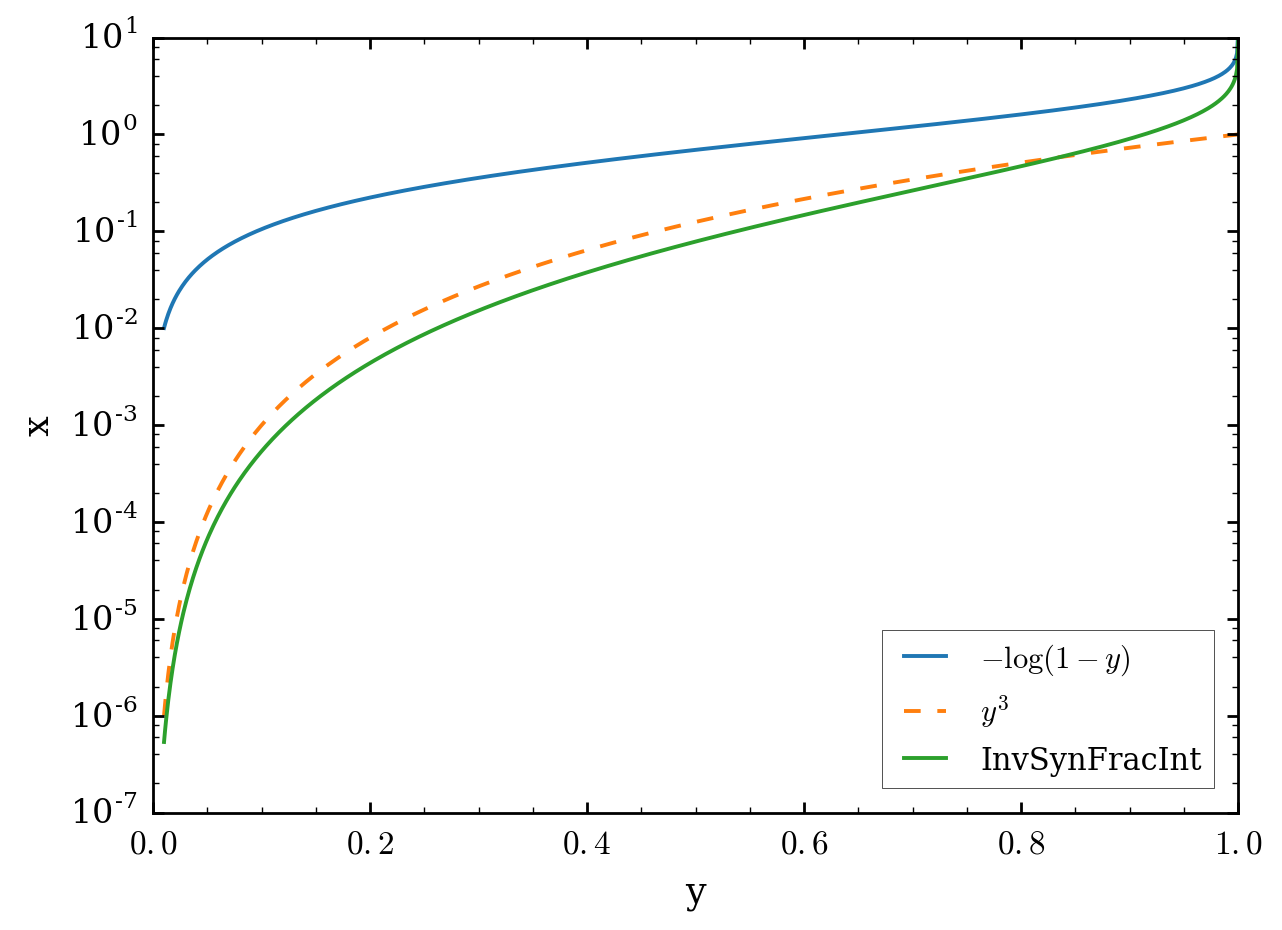

In [40]:
with mpl.style.context('rs_paper'):

    fig = plt.figure()
    ax = fig.gca()
    ax.semilogy(x,y, label=r'$-\log(1-y)$')
    ax.semilogy(x,x**3, '--', label=r'$y^3$')
    ax.semilogy(x,yt, label='InvSynFracInt')
    
    ax.set_ylabel('x')
    ax.set_xlabel('y')
    
    ax.legend(loc='lower right',prop={'size': 11})
    
    ax.set_ylim(1e-7,1e1)

## An attempt at reconstructing these values with numpy's Chebyshev functions

Here I've attempted to make the coordinate transformation that's done in Geant4 and still use numpy's Chebyshev functions so that I can better understand the algorithm. However, this approach still does not produce numbers in agreement with Geant4.

In [10]:
nps = 1000
x = np.linspace(0.01,0.99999,nps)
x1 = np.linspace(0.05,0.7,nps)
x2 = np.linspace(0.7,0.91322603,nps)
x3 = np.linspace(0.91322603,0.99999,nps)

def transformx(x,a,b):
    '''Performs a transformation on x before computing Chebyshev series'''
    return (2.*x - a - b)/(b-a)

xt1 = transformx(x1,0.01,0.7)
xt2 = transformx(x2,0.7,0.91322603)
xt3 = transformx(-1.*np.log(1-x3),a4,a5)


c1poly = np.polynomial.chebyshev.cheb2poly(c1vals)
c2poly = np.polynomial.chebyshev.cheb2poly(c2vals)

y1poly = np.polynomial.chebyshev.chebval(xt1,c1poly)*(x1**3)
y2poly = np.polynomial.chebyshev.chebval(xt2,c2poly)

y1new = np.polynomial.chebyshev.chebval(xt1,c1vals)*(x1**3)
y2new = np.polynomial.chebyshev.chebval(xt2,c2vals)
y3new = np.polynomial.chebyshev.chebval(xt3,c3vals)*-1.*np.log(1-x3)

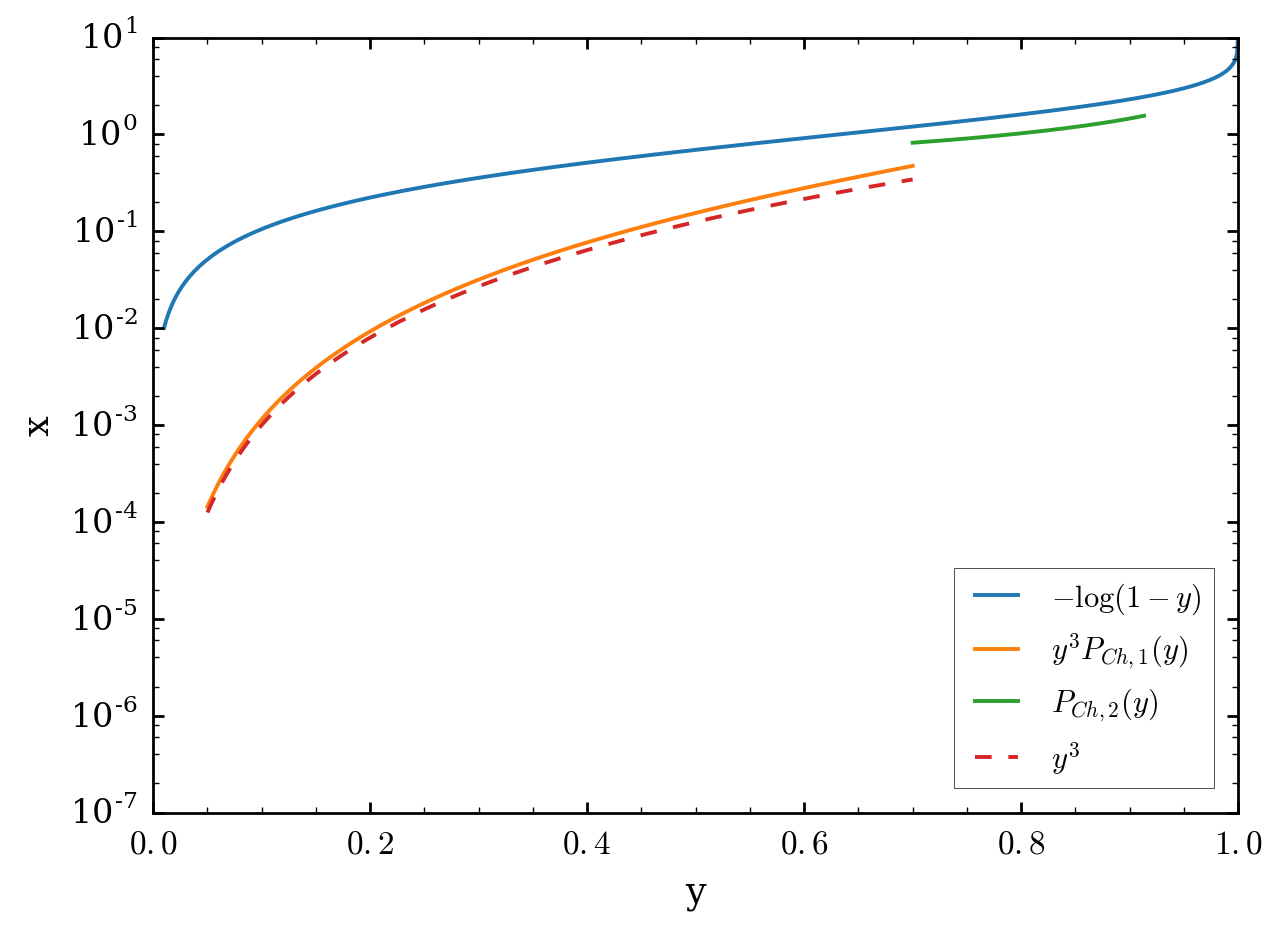

In [12]:
with mpl.style.context('rs_paper'):

    fig = plt.figure()
    ax = fig.gca()
    ax.semilogy(x,y, label=r'$-\log(1-y)$')
    ax.semilogy(x1,y1new, label=r'$y^3 P_{Ch,1}(y)$')
    ax.semilogy(x2,y2new, label=r'$P_{Ch,2}(y)$')
    ax.semilogy(x1,x1**3, '--', label=r'$y^3$')
    
    ax.set_ylabel('x')
    ax.set_xlabel('y')
    
    ax.legend(loc='lower right',prop={'size': 11})
    
    ax.set_ylim(1e-7,1e1)
    
    #fig.savefig('InvSynFracInt_compare.png', bbox_inches='tight')

### A poor first attempt

This was our first attempt to compute the functions, but clearly misinterpreted the nomenclature being used to describe the Chebyshev polynomials.

In [3]:
c1 = [0,1] #returns T1
c2 = [0,0,1] #returns T2
c3 = [0,0,0,1] #returns T3

In [4]:
nps = 1000
x = np.linspace(0.05,0.99999,nps)
x1 = np.linspace(0.05,0.7,nps)
x2 = np.linspace(0.7,0.91322603,nps)
x3 = np.linspace(0.91322603,0.99999,nps)

In [5]:
y = -1.*np.log(1.-x)
y1 = np.polynomial.chebyshev.chebval(x1,c1)*(x1**3)
y2 = np.polynomial.chebyshev.chebval(x2,c2)
y3 = -1.*(np.log(1.-x3))*np.polynomial.chebyshev.chebval(-1.*(np.log(1.-x3)),c3)

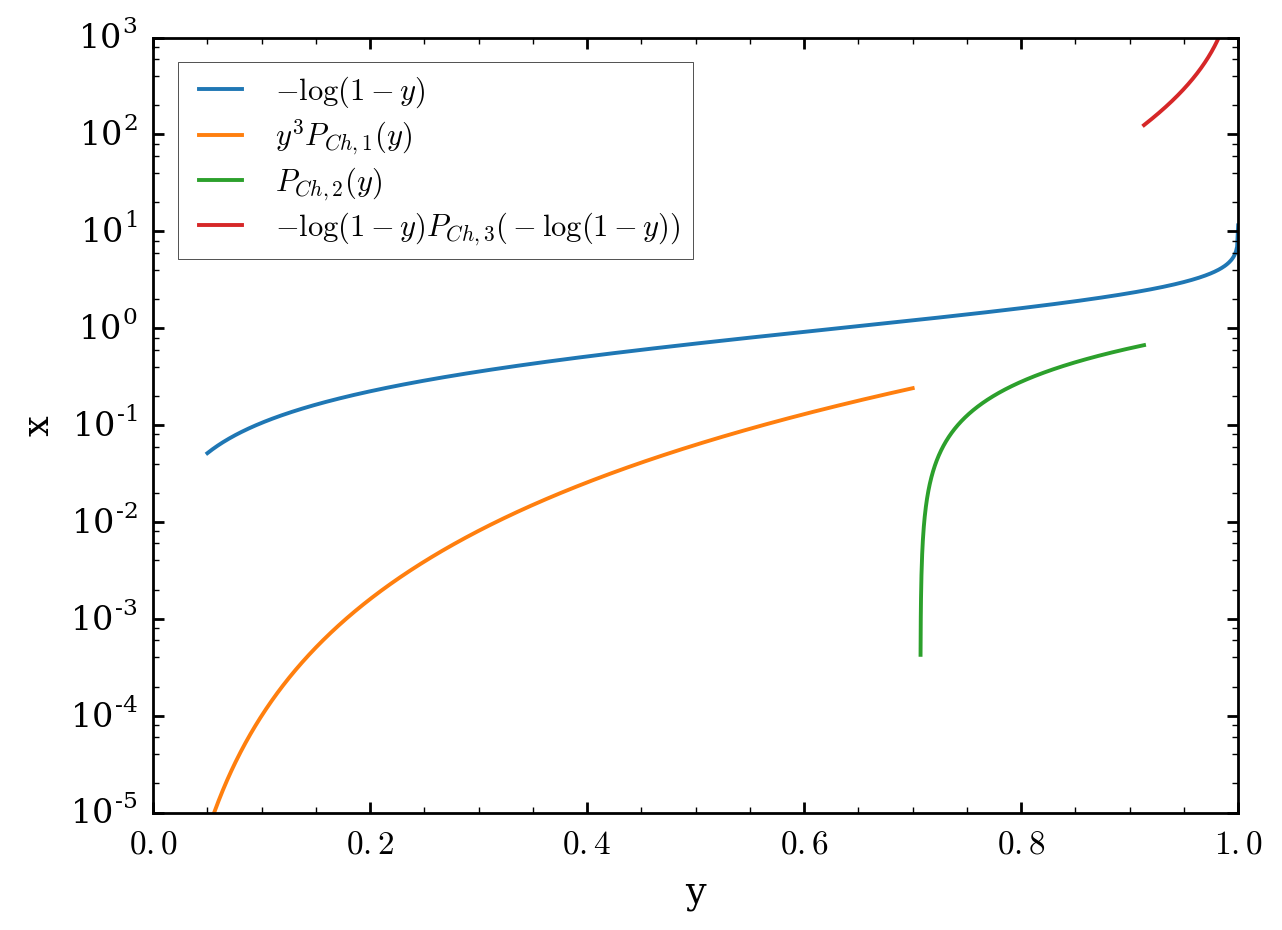

In [6]:
plt.rcParams.update({'legend.labelspacing':0.25, 'legend.handlelength': 2})

with mpl.style.context('rs_paper'):

    fig = plt.figure()
    ax = fig.gca()
    ax.semilogy(x,y, label=r'$-\log(1-y)$')
    ax.semilogy(x1,y1, label=r'$y^3 P_{Ch,1}(y)$')
    ax.semilogy(x2,y2, label=r'$P_{Ch,2}(y)$')
    ax.semilogy(x3,y3, label=r'$-\log(1-y)P_{Ch,3}(-\log(1-y))$')
    
    ax.set_ylabel('x')
    ax.set_xlabel('y')
    
    ax.legend(loc='best',prop={'size': 11})
    
    ax.set_ylim(1e-5,1e3)
    
    fig.savefig('InvSynFracInt_compare.png', bbox_inches='tight')